# WeatherPy

### <font color=red>IMPORTANT: You must update api_keys.py with your key for the book to run properly.</font>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [3]:
#Create dataframe
weather_df = pd.DataFrame(columns=["Id", "City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="

In [5]:
#Get the date for our chart. Putting in same cell as API call, so we know it matches the date when the data was requested
pretty_date = time.strftime("%x", time.localtime())

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

#set starting row for dataframe
row=0

for city in cities:
        try:
            query_url = base_url + city

            # Get current weather
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            #Set variables from result.
            city_id = weather_json["id"]
            city_name = weather_json["name"]
            cloudiness = weather_json["clouds"]["all"]
            country = weather_json["sys"]["country"]
            humidity = weather_json["main"]["humidity"]
            current_time = weather_json["dt"]
            lat = weather_json["coord"]["lat"]
            lon = weather_json["coord"]["lon"]
            max_temp = weather_json["main"]["temp_max"]
            wind_speed = weather_json["wind"]["speed"]

            #add rows to dataframe
            weather_df.loc[row] = [city_id, city_name, cloudiness, country, current_time, humidity, lat, lon, max_temp, wind_speed]

            print(f'The current summary for {city} is: \n      cloudiness: {cloudiness}, temp:{max_temp}\n')

            row+=1
        
        #Checking to make sure the City exists
        except(KeyError):
            print(f"{city} not found. Skipping...\n")

The current summary for punta arenas is: 
      cloudiness: 75, temp:41

The current summary for panzhihua is: 
      cloudiness: 100, temp:67.12

The current summary for elliot lake is: 
      cloudiness: 1, temp:78.8

The current summary for kieta is: 
      cloudiness: 100, temp:79

The current summary for nishihara is: 
      cloudiness: 90, temp:70

taolanaro not found. Skipping...

The current summary for avarua is: 
      cloudiness: 19, temp:71.6

The current summary for albany is: 
      cloudiness: 75, temp:86

The current summary for norman wells is: 
      cloudiness: 75, temp:62.6

sentyabrskiy not found. Skipping...

The current summary for port alfred is: 
      cloudiness: 0, temp:61

The current summary for chimbote is: 
      cloudiness: 0, temp:62.8

The current summary for dikson is: 
      cloudiness: 100, temp:41.74

The current summary for sorland is: 
      cloudiness: 75, temp:50

The current summary for westlock is: 
      cloudiness: 1, temp:80.01

The curren

The current summary for zyryanka is: 
      cloudiness: 50, temp:58.84

The current summary for sitka is: 
      cloudiness: 0, temp:89.01

The current summary for boa vista is: 
      cloudiness: 40, temp:89.6

The current summary for clyde river is: 
      cloudiness: 90, temp:41

The current summary for ponta do sol is: 
      cloudiness: 42, temp:67.48

The current summary for abu dhabi is: 
      cloudiness: 61, temp:93.2

The current summary for tuktoyaktuk is: 
      cloudiness: 75, temp:64.4

The current summary for charcas is: 
      cloudiness: 77, temp:77.38

The current summary for koygorodok is: 
      cloudiness: 0, temp:52.54

The current summary for giaveno is: 
      cloudiness: 75, temp:71.6

belushya guba not found. Skipping...

The current summary for plesetsk is: 
      cloudiness: 63, temp:46.42

The current summary for golden is: 
      cloudiness: 75, temp:93

The current summary for taltal is: 
      cloudiness: 100, temp:56.68

The current summary for bambous 

The current summary for severo-kurilsk is: 
      cloudiness: 85, temp:43.9

The current summary for sabzevar is: 
      cloudiness: 0, temp:78.46

The current summary for talnakh is: 
      cloudiness: 100, temp:51.8

The current summary for emerald is: 
      cloudiness: 63, temp:39.99

The current summary for kyrylivka is: 
      cloudiness: 9, temp:60.28

The current summary for amapa is: 
      cloudiness: 40, temp:93.2

The current summary for kamskiye polyany is: 
      cloudiness: 0, temp:62.6

The current summary for kurilsk is: 
      cloudiness: 100, temp:51.64

The current summary for bandarbeyla is: 
      cloudiness: 100, temp:79

The current summary for berlevag is: 
      cloudiness: 75, temp:44.6

The current summary for sisimiut is: 
      cloudiness: 0, temp:44.26

The current summary for nchelenge is: 
      cloudiness: 0, temp:63.7

The current summary for gweta is: 
      cloudiness: 0, temp:61.54

The current summary for goundam is: 
      cloudiness: 31, temp:97

The current summary for sayhat is: 
      cloudiness: 0, temp:93.2

The current summary for veraval is: 
      cloudiness: 0, temp:64.4

The current summary for keti bandar is: 
      cloudiness: 90, temp:83.14

The current summary for la sarre is: 
      cloudiness: 66, temp:77.92

The current summary for coihueco is: 
      cloudiness: 75, temp:55.4

The current summary for cap malheureux is: 
      cloudiness: 40, temp:66

The current summary for pisco is: 
      cloudiness: 90, temp:71.6

The current summary for kaitangata is: 
      cloudiness: 76, temp:37

The current summary for port augusta is: 
      cloudiness: 0, temp:50

The current summary for ordynskoye is: 
      cloudiness: 0, temp:58.48

The current summary for sinnamary is: 
      cloudiness: 0, temp:81.7

The current summary for nikolskoye is: 
      cloudiness: 0, temp:57.2

The current summary for moa is: 
      cloudiness: 4, temp:82.78

himora not found. Skipping...

The current summary for jambi is: 
      cloud

The current summary for puerto del rosario is: 
      cloudiness: 20, temp:75.2

The current summary for progreso is: 
      cloudiness: 0, temp:51.8

The current summary for adrar is: 
      cloudiness: 0, temp:111.2

The current summary for guerrero negro is: 
      cloudiness: 0, temp:69.1

The current summary for merauke is: 
      cloudiness: 100, temp:77.38

The current summary for rognac is: 
      cloudiness: 20, temp:82.4

The current summary for palmer is: 
      cloudiness: 75, temp:53.01

The current summary for constantine is: 
      cloudiness: 0, temp:78.8

The current summary for talcahuano is: 
      cloudiness: 40, temp:55.4

The current summary for barahona is: 
      cloudiness: 75, temp:86

The current summary for udachnyy is: 
      cloudiness: 75, temp:59

The current summary for takoradi is: 
      cloudiness: 0, temp:72.16

The current summary for rio gallegos is: 
      cloudiness: 0, temp:39.2

The current summary for whitianga is: 
      cloudiness: 14, temp

The current summary for ovalle is: 
      cloudiness: 0, temp:63.7

The current summary for katherine is: 
      cloudiness: 54, temp:60.8

The current summary for dingle is: 
      cloudiness: 93, temp:73.6

The current summary for khilok is: 
      cloudiness: 72, temp:56.32

The current summary for vyartsilya is: 
      cloudiness: 97, temp:45.7

The current summary for tomatlan is: 
      cloudiness: 97, temp:86.38

The current summary for maroua is: 
      cloudiness: 100, temp:74.5

The current summary for kabanjahe is: 
      cloudiness: 100, temp:68.38

The current summary for tocopilla is: 
      cloudiness: 100, temp:57.76

The current summary for hobyo is: 
      cloudiness: 15, temp:77.74

The current summary for banjar is: 
      cloudiness: 35, temp:65.32

The current summary for laguna is: 
      cloudiness: 40, temp:89.6

The current summary for qaqortoq is: 
      cloudiness: 0, temp:64.4

pemangkat not found. Skipping...

The current summary for lukulu is: 
      clou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv("city_weather_data.csv")

In [7]:
weather_df.head(10)

,Id,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3874787,Punta Arenas,75,CL,1563134686,93,-53.16,-70.91,41,6.93
1,6929460,Panzhihua,100,CN,1563134686,92,26.59,101.72,67.12,1.57
2,5947866,Elliot Lake,1,CA,1563134686,39,46.37,-82.65,78.8,11.41
3,2094027,Kieta,100,PG,1563134687,78,-6.22,155.63,79,3.51
4,1850144,Nishihara,90,JP,1563134687,100,35.74,139.53,70,4.70
5,4035715,Avarua,19,CK,1563134599,73,-21.21,-159.78,71.6,4.70
6,5106834,Albany,75,US,1563134545,57,42.65,-73.75,86,10.29
7,6089245,Norman Wells,75,CA,1563134687,63,65.28,-126.83,62.6,5.82
8,964432,Port Alfred,0,ZA,1563134688,91,-33.59,26.89,61,1.01
9,3698304,Chimbote,0,PE,1563134688,87,-9.08,-78.59,62.8,16.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

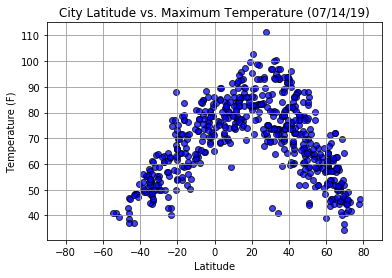

<Figure size 432x288 with 0 Axes>

In [8]:
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Maximum Temperature ({pretty_date})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(b=True, which='major', color='#999999', linestyle='-')

#create graph
plt.scatter(x=weather_df['Lat'], y=weather_df['Max Temp'], alpha=0.75, c='blue', edgecolors='black', label="Urban")

#show
plt.show()

# Save Figure
plt.savefig("lat_vs_temp.png")

#### Latitude vs. Humidity Plot

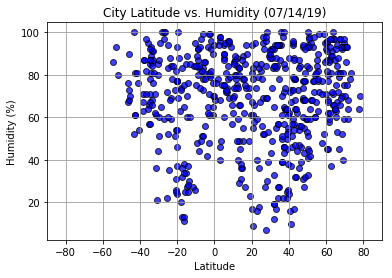

<Figure size 432x288 with 0 Axes>

In [9]:
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({pretty_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, which='major', color='#999999', linestyle='-')

#create graph
plt.scatter(x=weather_df['Lat'], y=weather_df['Humidity'], alpha=0.75, c='blue', edgecolors='black', label="Urban")

#show
plt.show()

# Save Figure
plt.savefig("lat_vs_temp.png")

#### Latitude vs. Cloudiness Plot

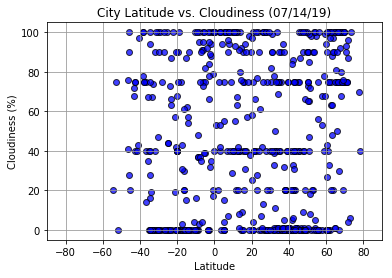

<Figure size 432x288 with 0 Axes>

In [10]:
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({pretty_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, which='major', color='#999999', linestyle='-')

#create graph
plt.scatter(x=weather_df['Lat'], y=weather_df['Cloudiness'], alpha=0.75, c='blue', edgecolors='black', label="Urban")

#show
plt.show()

# Save Figure
plt.savefig("lat_vs_temp.png")

#### Latitude vs. Wind Speed Plot

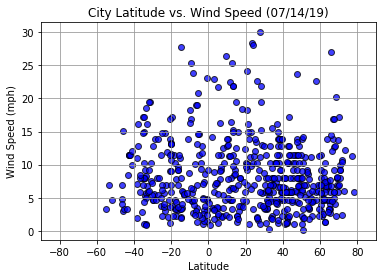

<Figure size 432x288 with 0 Axes>

In [11]:
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({pretty_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True, which='major', color='#999999', linestyle='-')

#create graph
plt.scatter(x=weather_df['Lat'], y=weather_df['Wind Speed'], alpha=0.75, c='blue', edgecolors='black', label="Urban")

#show
plt.show()

# Save Figure
plt.savefig("lat_vs_temp.png")

## Trends

- Temperature is correlated with distance from the equator.
- Temperature are currently highest between the 20th and 40th latitiude.
- Cloudiness and Humidity do not appear to correlate with the Latitude.
- High wind speeds(above 15 mph) are less common overall but also as you get further away from the equator.
- On 7/14 humidity above 50% was most common.